<a href="https://colab.research.google.com/github/jeibloo/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/LS_DS_131_Statistics_Probability_and_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Lesson 1*

# Statistics, Probability and Inference

Ever thought about how long it takes to make a pancake? Have you ever compared the tooking time of a pancake on each eye of your stove? Is the cooking time different between the different eyes? Now, we can run an experiment and collect a sample of 1,000 pancakes on one eye and another 800 pancakes on the other eye. Assumed we used the same pan, batter, and technique on both eyes. Our average cooking times were 180 (5 std) and 178.5 (4.25 std) seconds repsectively. Now, we can tell those numbers are not identicial, but how confident are we that those numbers are practically the same? How do we know the slight difference isn't caused by some external randomness?

Yes, today's lesson will help you figure out how long to cook your pancakes (*theoretically*). Experimentation is up to you; otherwise, you have to accept my data as true. How are going to accomplish this? With probability, statistics, inference and maple syrup (optional). 

<img src="https://images.unsplash.com/photo-1541288097308-7b8e3f58c4c6?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=3300&q=80" width=400>

## Learning Objectives
* [Part 1](#p1): Normal Distribution Revisted
* [Part 2](#p2): Student's T Test
* [Part 3](#p3): Hypothesis Test & Doing it Live

## Normal Distribution Revisited

What is the Normal distribution: A probability distribution of a continuous real valued random-variable. The Normal distribution properties make it useful for the *Central Limit Theorm*, because if we assume a variable follows the normal distribution, we can make certain conclusions based on probabilities.

In [0]:
import numpy as np

mu = 0 # mean
sigma = 0.1 # standard deviation

sample = np.random.normal(mu, sigma, 1000)

In [0]:
# Verify the mean of our sample
abs(mu - np.mean(sample)) < 0.01

True

In [0]:
# Verify the variance of our sample
abs(sigma - np.std(sample, ddof=1)) < 0.01

True

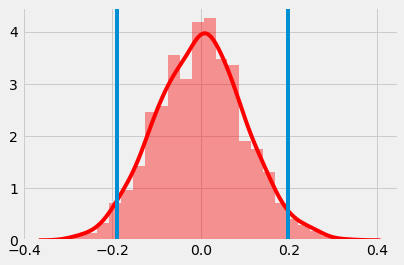

In [0]:
import seaborn as sns
from matplotlib import style

style.use('fivethirtyeight')

ax = sns.distplot(sample, color='r')
ax.axvline(np.percentile(sample,97.5),0)
ax.axvline(np.percentile(sample,2.5),0)

## Student's T Test

>Assuming data come from a Normal distribution, the t test provides a way to test whether the sample mean (that is the mean calculated from the data) is a good estimate of the population mean. 

The derivation of the t-distribution was first published in 1908 by William Gosset while working for the Guinness Brewery in Dublin. Due to proprietary issues, he had to publish under a pseudonym, and so he used the name Student.

The t-distribution is essentially a distribution of means of normaly distributed data. When we use a t-statistic, we are  checking that a mean fails within a certain $\alpha$ probability of the mean of means.

In [0]:
t_df10 = np.random.standard_t(df=10, size=10)
t_df100 = np.random.standard_t(df=100, size=100)
t_df1000 = np.random.standard_t(df=1000, size=1000)

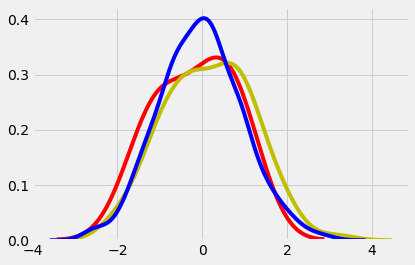

In [0]:
sns.kdeplot(t_df10, color='r');
sns.kdeplot(t_df100, color='y');
sns.kdeplot(t_df1000, color='b');

In [0]:
i = 10
for sample in [t_df10, t_df100, t_df1000]:
    print(f"t - distribution with {i} degrees of freedom")
    print("---" * 10)
    print(f"Mean: {sample.mean()}")
    print(f"Standard Deviation: {sample.std()}")
    print(f"Variance: {sample.var()}")
    i = i*10

t - distribution with 10 degrees of freedom
------------------------------
Mean: -0.31273998586964813
Standard Deviation: 1.1501190874764438
Variance: 1.3227739153776474
t - distribution with 100 degrees of freedom
------------------------------
Mean: -0.08090662415049571
Standard Deviation: 1.0383358313816349
Variance: 1.0781412987309908
t - distribution with 1000 degrees of freedom
------------------------------
Mean: 0.026011887125489363
Standard Deviation: 0.9716065366464899
Variance: 0.9440192620541868


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test. We will also dig a bit deeper into how the test statistic is calculated based on the sample error, and visually what it looks like to have 1 or 2 "tailed" t-tests.

In [0]:
# TODO - during class, but please help!

from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel
import numpy as np

# Burner 1; 180
mu1 = 180
# std dev
sigma1 = 5
# sample size
n1 = 1000
# Simulate a thousand data points
sample1 = np.random.normal(mu1,sigma1,n1)

# Burner 2; 178.5
mu2 = 178.5
# std dev
sigma2 = 4.25
n2 = 800
sample2 = np.random.normal(mu1,sigma1,n2)

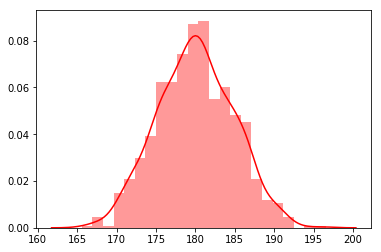

In [11]:
import seaborn as sns
ax = sns.distplot(sample1, color='r')

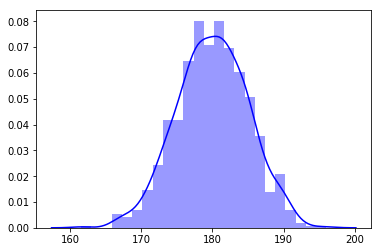

In [12]:
ax = sns.distplot(sample2, color='b')

### Before:

1) Null Hypo (boring/default state)
- the two burners the same $\mu_{1} = \mu_{2}$ 

2) Alt. Hypo (opposite of null hypo)
- cooking times are different

3) Confidence Level: 95%

**Confidence Level of 95%** (reach incorrect conclusion only 5% of the time)

p < 1 - Confidence Level

1- Confidence Level = $\alpha$

I REJECT THE NULL HYPO when my P-value < $\alpha$ (1 - Confidence Level)

In [13]:
ttest_ind(sample1,sample2)

Ttest_indResult(statistic=0.06899602393093983, pvalue=0.945000456479347)

### After:

4) T-stat: 6.362

5) P-value: .000000000251

What is t-stat?: ~Roughly the # of std. dev. away from mean, that coorresponds to the differences in means we've observed given their sample sizes.

What is p-val?: ~Probability that what we have observed (the t-statist that we get) could have happened by random chance.

### Interpretation:

Due to calculating a t-stat of 6.362 which corresponds to a p-value of .000000000251, we reject null hypo that the mean of cooking times betwixt two burners is equal, and suggest alt. hypo that they're different.

Write this ^ process down for each assignment

# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars
- https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/v/two-sample-t-test-for-difference-of-means